In [2]:
import numpy as np
import pandas as pd
import pathlib
import nltk
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
processed_data_path = pathlib.Path('../data/processed/')

In [4]:
train_text_tsv = processed_data_path / 'train.text.tsv'

In [5]:
cons = pd.read_csv(train_text_tsv, sep='\t', header=None, index_col=0)

In [6]:
cons.head()

,1,2,3,4,5
0,,,,,
0,True,None,None,From flickr.com : Money { MID-161793 } <splt> ...,Kucinich : Reclaiming the money power
1,True,None,None,Donald Trump ran on many braggadocios and larg...,Trump Just Woke Up & Viciously Attacked Puerto...
2,True,None,None,Photo By Justin Sullivan / Getty Images <splt>...,"Liberals wailing about gun control , but what ..."
3,True,None,None,After Colin Kaepernick rightly chose to kneel ...,Laremy Tunsil joins NFL players in kneeling du...
4,False,None,None,"Almost a half - century ago , in 1968 , the Un...",It 's 1968 All Over Again


In [7]:
cons.columns = ['hyperpartisan', '1', '2', 'text', 'title']

In [8]:
cons.head()

,hyperpartisan,1,2,text,title
0,,,,,
0,True,None,None,From flickr.com : Money { MID-161793 } <splt> ...,Kucinich : Reclaiming the money power
1,True,None,None,Donald Trump ran on many braggadocios and larg...,Trump Just Woke Up & Viciously Attacked Puerto...
2,True,None,None,Photo By Justin Sullivan / Getty Images <splt>...,"Liberals wailing about gun control , but what ..."
3,True,None,None,After Colin Kaepernick rightly chose to kneel ...,Laremy Tunsil joins NFL players in kneeling du...
4,False,None,None,"Almost a half - century ago , in 1968 , the Un...",It 's 1968 All Over Again


In [9]:
cons = cons.drop(columns=['1','2'])

In [10]:
cons.head()

,hyperpartisan,text,title
0,,,
0,True,From flickr.com : Money { MID-161793 } <splt> ...,Kucinich : Reclaiming the money power
1,True,Donald Trump ran on many braggadocios and larg...,Trump Just Woke Up & Viciously Attacked Puerto...
2,True,Photo By Justin Sullivan / Getty Images <splt>...,"Liberals wailing about gun control , but what ..."
3,True,After Colin Kaepernick rightly chose to kneel ...,Laremy Tunsil joins NFL players in kneeling du...
4,False,"Almost a half - century ago , in 1968 , the Un...",It 's 1968 All Over Again


In [47]:
Nsamp = 1000
maxtokens = 100
maxtokenlen = 20

In [48]:
def tokenize(row):
    if row is None or row == '':
        tokens = ""
    else:
        tokens = str(row).split(" ")[:maxtokens]
    return tokens

In [49]:
cons['tokens'] = cons.text.apply(tokenize).values

In [50]:
def assemble_bag(data):
    used_tokens = []
    all_tokens = []
 
    for item in data:
        for token in item:
            if token in all_tokens:      # A
                if token not in used_tokens:
                    used_tokens.append(token)
            else:
                all_tokens.append(token)
    
    df = pd.DataFrame(0, index = np.arange(len(data)), columns = used_tokens)
    
    for i, item in enumerate(data): # B
        for token in item:
            if token in used_tokens:
                df.iloc[i][token] += 1    
    return df

In [51]:
bow = assemble_bag(cons.tokens)

In [52]:
bow['hyperpartisan'] = cons.hyperpartisan

In [53]:
X_train, X_test, y_train, y_test = train_test_split(bow.drop(columns='hyperpartisan'), bow.hyperpartisan)

In [54]:
model = LogisticRegression()

In [55]:
model.fit(X_train, y_train)

/home/zarak/anaconda3/envs/media-bias3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
preds = model.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preds)

0.691358024691358

In [58]:
preds

array([False, False, False, False, False, False, False,  True, False,
        True, False, False, False, False,  True, False,  True, False,
       False, False,  True, False, False, False,  True,  True, False,
       False, False, False, False, False,  True, False,  True,  True,
        True,  True, False, False, False,  True, False, False, False,
       False, False,  True, False, False,  True, False, False,  True,
        True, False, False, False, False, False, False, False, False,
        True,  True, False,  True,  True, False, False, False,  True,
       False, False, False,  True, False,  True, False,  True, False,
       False,  True, False,  True, False, False, False,  True,  True,
        True,  True, False,  True, False, False,  True, False,  True,
       False,  True,  True, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False,  True, False, False, False,
        True, False,

In [59]:
import time
from sklearn.svm import SVC
 
clf = SVC(C=1, gamma="auto", kernel='linear', probability=False)
 
start_time = time.time()
clf.fit(X_train, y_train)
end_time = time.time()
print("Training the SVC Classifier took %3d seconds"%(end_time-start_time))
 
predicted_labels = clf.predict(X_test)
acc_score = accuracy_score(y_test, predicted_labels)
print("The SVC Classifier testing accuracy score is::")
print(acc_score)

Training the SVC Classifier took   0 seconds
The SVC Classifier testing accuracy score is::
0.6728395061728395


In [60]:
import time
from sklearn.ensemble import RandomForestClassifier
 
clf = RandomForestClassifier(n_jobs=1, random_state=0)
 
start_time = time.time()
clf.fit(X_train, y_train)
end_time = time.time()
print("Training the Random Forest Classifier took %3d seconds"%(end_time-start_time))

 
predicted_labels = clf.predict(X_test)
acc_score = accuracy_score(y_test, predicted_labels)
print("The RF testing accuracy score is:")
print(acc_score)

Training the Random Forest Classifier took   0 seconds
The RF testing accuracy score is:
0.7283950617283951


In [61]:
test_probs = clf.predict_proba(X_test)

In [65]:
test_probs[:,1]

array([0.24      , 0.2       , 0.27      , 0.31      , 0.21      ,
       0.32      , 0.28      , 0.48      , 0.29      , 0.24      ,
       0.18      , 0.10333333, 0.31607143, 0.2       , 0.46      ,
       0.42      , 0.39      , 0.29      , 0.23      , 0.26      ,
       0.40933333, 0.26514286, 0.13      , 0.3       , 0.65      ,
       0.33      , 0.41      , 0.17      , 0.39      , 0.3       ,
       0.25      , 0.32      , 0.47      , 0.26      , 0.246     ,
       0.47      , 0.351     , 0.26833333, 0.42      , 0.39      ,
       0.42      , 0.43      , 0.24      , 0.4       , 0.49      ,
       0.166     , 0.266     , 0.4       , 0.3       , 0.34      ,
       0.55      , 0.33      , 0.02      , 0.3       , 0.51      ,
       0.36      , 0.2       , 0.25      , 0.21      , 0.19      ,
       0.28      , 0.326     , 0.34      , 0.42      , 0.35      ,
       0.26      , 0.63666667, 0.56      , 0.23      , 0.41      ,
       0.37      , 0.485     , 0.35333333, 0.2       , 0.27   

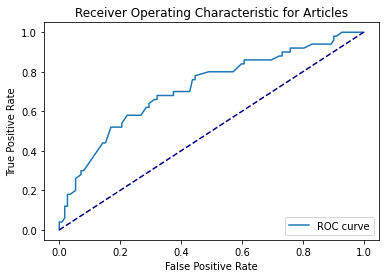

In [66]:
import matplotlib.pyplot as plt # C
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test.values, test_probs[:, 1], pos_label=True)
 
fig,ax = plt.subplots()
plt.plot(fpr,tpr,label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Articles')
plt.legend(loc="lower right")
plt.show()

In [67]:
y_test.values

array([ True,  True, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False,  True,
        True,  True, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False, False, False, False,
        True,  True, False, False, False,  True, False, False,  True,
        True, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False,  True, False,  True,
       False, False,  True, False, False,  True, False,  True, False,
       False,  True, False, False, False,  True,  True, False, False,
       False,  True, False,  True, False, False,  True, False, False,
       False,  True,  True, False,  True, False, False, False, False,
       False, False, False,  True,  True, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
        True, False,

In [28]:
import tensorflow as tf
import tensorflow_hub as hub

import matplotlib.pyplot as plt

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

Version:  2.3.1
Eager mode:  True
Hub version:  0.10.0
GPU is available


In [29]:
url = "https://tfhub.dev/google/elmo/3"
hub_layer = hub.KerasLayer(url, output_shape=[1024], input_shape=[], 
                           dtype=tf.string)


In [30]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1024)              93600852  
_________________________________________________________________
dense (Dense)                (None, 16)                16400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 93,617,269
Trainable params: 16,417
Non-trainable params: 93,600,852
_________________________________________________________________


In [31]:
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(cons.text.values, cons.hyperpartisan.values)

In [33]:
history = model.fit(X_train,
                    y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(X_test, y_test),
                    verbose=1)

Epoch 1/40


AttributeError: in user code:

    /home/zarak/anaconda3/envs/media-bias3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/zarak/anaconda3/envs/media-bias3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/zarak/anaconda3/envs/media-bias3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/zarak/anaconda3/envs/media-bias3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/zarak/anaconda3/envs/media-bias3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/zarak/anaconda3/envs/media-bias3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /home/zarak/anaconda3/envs/media-bias3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:756 train_step
        _minimize(self.distribute_strategy, tape, self.optimizer, loss,
    /home/zarak/anaconda3/envs/media-bias3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2722 _minimize
        gradients = tape.gradient(loss, trainable_variables)
    /home/zarak/anaconda3/envs/media-bias3.8/lib/python3.8/site-packages/tensorflow/python/eager/backprop.py:1067 gradient
        flat_grad = imperative_grad.imperative_grad(
    /home/zarak/anaconda3/envs/media-bias3.8/lib/python3.8/site-packages/tensorflow/python/eager/imperative_grad.py:71 imperative_grad
        return pywrap_tfe.TFE_Py_TapeGradient(
    /home/zarak/anaconda3/envs/media-bias3.8/lib/python3.8/site-packages/tensorflow/python/eager/function.py:797 _backward_function
        return self._rewrite_forward_and_call_backward(call_op, *args)
    /home/zarak/anaconda3/envs/media-bias3.8/lib/python3.8/site-packages/tensorflow/python/eager/function.py:712 _rewrite_forward_and_call_backward
        forward_function, backwards_function = self.forward_backward(len(doutputs))
    /home/zarak/anaconda3/envs/media-bias3.8/lib/python3.8/site-packages/tensorflow/python/eager/function.py:621 forward_backward
        forward, backward = self._construct_forward_backward(num_doutputs)
    /home/zarak/anaconda3/envs/media-bias3.8/lib/python3.8/site-packages/tensorflow/python/eager/function.py:664 _construct_forward_backward
        func_graph_module.func_graph_from_py_func(
    /home/zarak/anaconda3/envs/media-bias3.8/lib/python3.8/site-packages/tensorflow/python/framework/func_graph.py:986 func_graph_from_py_func
        func_outputs = python_func(*func_args, **func_kwargs)
    /home/zarak/anaconda3/envs/media-bias3.8/lib/python3.8/site-packages/tensorflow/python/eager/function.py:655 _backprop_function
        return gradients_util._GradientsHelper(  # pylint: disable=protected-access
    /home/zarak/anaconda3/envs/media-bias3.8/lib/python3.8/site-packages/tensorflow/python/ops/gradients_util.py:550 _GradientsHelper
        reachable_to_ops, pending_count, loop_state = _PendingCount(
    /home/zarak/anaconda3/envs/media-bias3.8/lib/python3.8/site-packages/tensorflow/python/ops/gradients_util.py:123 _PendingCount
        loop_state = control_flow_state.MaybeCreateControlFlowState(
    /home/zarak/anaconda3/envs/media-bias3.8/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_state.py:780 MaybeCreateControlFlowState
        loop_state.AddWhileContext(op, between_op_list, between_ops)
    /home/zarak/anaconda3/envs/media-bias3.8/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_state.py:577 AddWhileContext
        outer_forward_ctxt = forward_ctxt.outer_context

    AttributeError: 'NoneType' object has no attribute 'outer_context'


In [ ]:
class ElmoEmbeddingLayer(Layer):
    def __init__(self, **kwargs):
        self.dimensions = 1024
        self.trainable=True
        super(ElmoEmbeddingLayer, self).__init__(**kwargs)
 
    def build(self, input_shape):
        self.elmo = hub.Module(
            'https://tfhub.dev/google/elmo/2',
            trainable=self.trainable, 
            name="{}_module".format(self.name))
        self.trainable_weights += K.tf.trainable_variables(scope="^{}_module/.*".format(self.name)) # E
        super(ElmoEmbeddingLayer, self).build(input_shape)
 
    def call(self, x, mask=None):
        result = self.elmo(K.squeeze(K.cast(x, tf.string), axis=1),
                      as_dict=True,
                      signature='default',
                      )['default']
        return result
 
    def compute_output_shape(self, input_shape): # F
        return (input_shape[0], self.dimensions)

In [ ]:
def convert_data(raw_data,header):   # A
    converted_data, labels = [], []
    for i in range(raw_data.shape[0]):
        out = ' '.join(raw_data[i]) # B
        converted_data.append(out)
        labels.append(header[i])
    converted_data = np.array(converted_data, dtype=object)[:, np.newaxis]
    
    return converted_data, np.array(labels)
 
# train_x, train_y = convert_data(con.tokens.values, y_train.values) # D
# test_x, test_y = convert_data(X_test.values, y_test.values) # E

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cons.tokens.values, cons.hyperpartisan.values)

In [ ]:
train_x, train_y = convert_data(X_train, y_train) # D
test_x, test_y = convert_data(X_test, y_test) # E

In [ ]:
def build_model(): 
    input_text = layers.Input(shape=(1,), dtype="string")
    embedding = ElmoEmbeddingLayer()(input_text)
    dense = layers.Dense(256, activation='relu')(embedding) # A
    pred = layers.Dense(1, activation='sigmoid')(dense) # B
   
    model = Model(inputs=[input_text], outputs=pred)
   
    model.compile(loss='binary_crossentropy', optimizer='adam',
                                   metrics=['accuracy'])  # C
    model.summary() # D
    
    return model
 
# Build and fit
model = build_model()
model.fit(train_x,     # E
          train_y,
          validation_data=(test_x, test_y),
          epochs=5,
          batch_size=32)